TP03: Encontrar el logotipo de la gaseosa dentro de las imagenes provistas 

1. (4 puntos) Obtener una deteccion del logo en cada imagen sin falsos positivos
2. (4 puntos) Plantear y validad un algoritmo para multiples detecciones en la imagen coca_multi.png con el mismo template del item 1
3. (2 puntos) Generalizar el algoritmo del item 2 para todas las imagenes

Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza de la deteccion.

##### Cargamos los datos

In [2]:
import numpy as np
import cv2 as cv
import random
from IPython.display import clear_output
%matplotlib inline
import matplotlib.pyplot as plt

Convertir la imagen jpg a png:

In [4]:
cv.imwrite('./Material_TPs/TP3/images/COCA-COLA-LOGO.png', cv.imread('./Material_TPs/TP3/images/COCA-COLA-LOGO.jpg'))

True

In [5]:
# Cargamos la imagenes a procesar
img_path1 = './Material_TPs/TP3/images'
img_path2 = './Material_TPs/TP3/template'
img1 = cv.imread(img_path1 + '/coca_logo_1.png')
img2 = cv.imread(img_path1 + '/coca_logo_2.png')
img3 = cv.imread(img_path1 + '/coca_multi.png')
img4 = cv.imread(img_path1 + '/coca_retro_1.png')
img5 = cv.imread(img_path1 + '/coca_retro_2.png')
img6 = cv.imread(img_path1 + '/COCA-COLA-LOGO.png')
img7 = cv.imread(img_path1 + '/logo_1.png')
template = cv.imread(img_path2 + '/pattern.png')

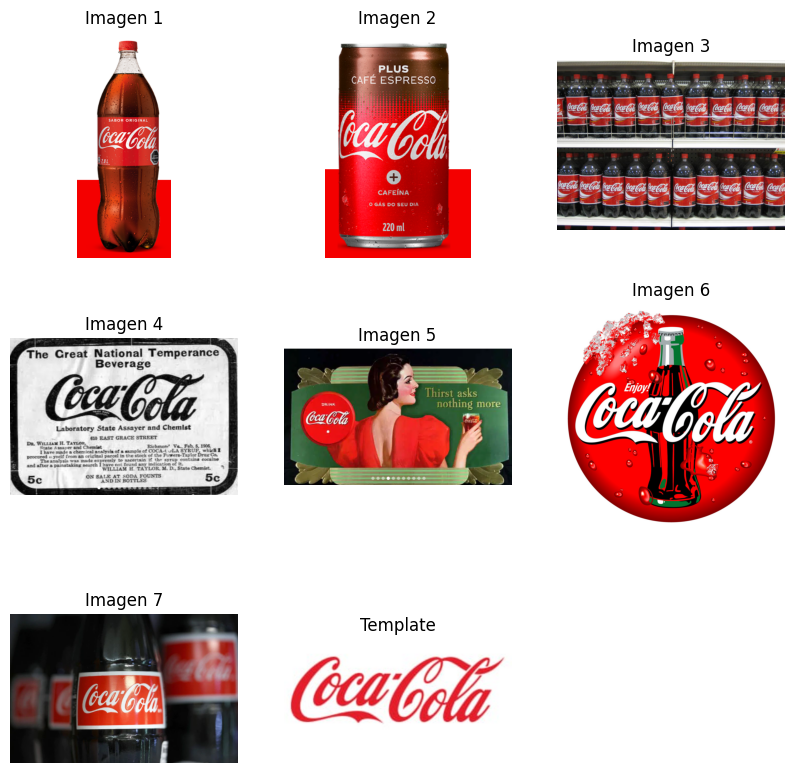

In [6]:
# Lista de imágenes y sus títulos
imagenes = [img1, img2, img3, img4, img5, img6, img7, template]
titulos = [f'Imagen {i}' for i in range(1, 8)] + ['Template']

# Configuración de la figura
plt.figure(figsize=(10, 10))

# Bucle para mostrar las imágenes
for i, (img, titulo) in enumerate(zip(imagenes, titulos), 1):
    plt.subplot(3, 3, i)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title(titulo)
    plt.axis('off')

# Mostrar todas las imágenes
plt.show()

In [7]:
altura_template, ancho_template = template.shape[:2]
print("Tamaño de template 1 (altura, ancho):", (altura_template, ancho_template))
template2 = cv.resize(template, (160, 70))
altura_template2, ancho_template2 = template2.shape[:2]
print("Tamaño de template 2 (altura, ancho):", (altura_template2, ancho_template2))

Tamaño de template 1 (altura, ancho): (175, 400)
Tamaño de template 2 (altura, ancho): (70, 160)


In [8]:
# Define una lista de imágenes
imagenes = [img1,img2,img3,img4,img5,img6,img7]

# Itera sobre cada imagen y obtiene su tamaño
for i, imagen in enumerate(imagenes):
    altura, ancho = imagen.shape[:2]
    print("Tamaño de imagen", i+1, "(altura, ancho):", (altura, ancho))

Tamaño de imagen 1 (altura, ancho): (500, 207)
Tamaño de imagen 2 (altura, ancho): (363, 233)
Tamaño de imagen 3 (altura, ancho): (598, 799)
Tamaño de imagen 4 (altura, ancho): (493, 715)
Tamaño de imagen 5 (altura, ancho): (429, 715)
Tamaño de imagen 6 (altura, ancho): (1389, 1389)
Tamaño de imagen 7 (altura, ancho): (450, 687)


In [9]:
# Transformamos las imagenes en escala de grises
img1_gris = cv.imread(img_path1 + '/coca_logo_1.png', cv.IMREAD_GRAYSCALE)
img2_gris = cv.imread(img_path1 + '/coca_logo_2.png', cv.IMREAD_GRAYSCALE)
img3_gris = cv.imread(img_path1 + '/coca_multi.png', cv.IMREAD_GRAYSCALE)
img4_gris = cv.imread(img_path1 + '/coca_retro_1.png', cv.IMREAD_GRAYSCALE)
img5_gris = cv.imread(img_path1 + '/coca_retro_2.png', cv.IMREAD_GRAYSCALE)
img6_gris = cv.imread(img_path1 + '/COCA-COLA-LOGO.jpg', cv.IMREAD_GRAYSCALE)
img7_gris = cv.imread(img_path1 + '/logo_1.png', cv.IMREAD_GRAYSCALE)
template_gris = cv.imread(img_path2 + '/pattern.png', cv.IMREAD_GRAYSCALE)

In [10]:
# Guardamos las imagenes en RGB
img1_rgb= cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2_rgb= cv.cvtColor(img2, cv.COLOR_BGR2RGB)
img3_rgb= cv.cvtColor(img3, cv.COLOR_BGR2RGB)
img4_rgb= cv.cvtColor(img4, cv.COLOR_BGR2RGB)
img5_rgb= cv.cvtColor(img5, cv.COLOR_BGR2RGB)
img6_rgb= cv.cvtColor(img6, cv.COLOR_BGR2RGB)
img7_rgb= cv.cvtColor(img7, cv.COLOR_BGR2RGB)
template2_rgb= cv.cvtColor(template2, cv.COLOR_BGR2RGB)
template2_gris= cv.cvtColor(template2, cv.COLOR_BGR2GRAY)

#### Comparación según los distintos métodos

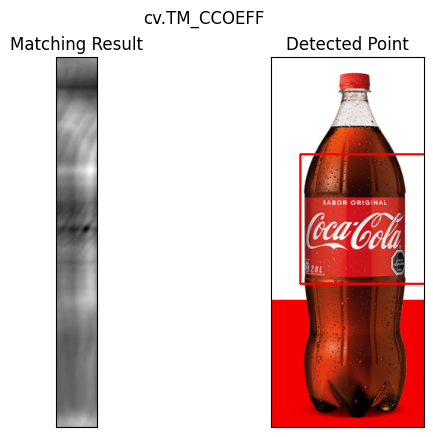

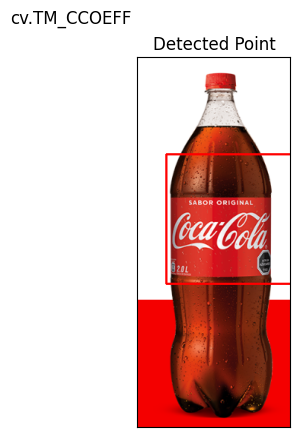

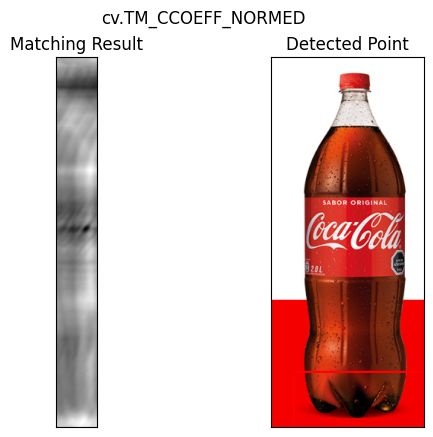

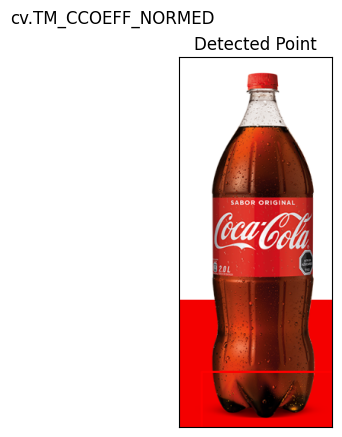

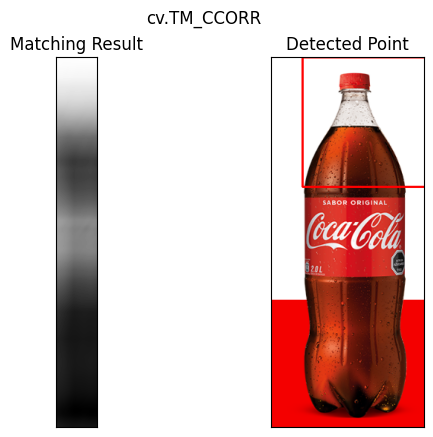

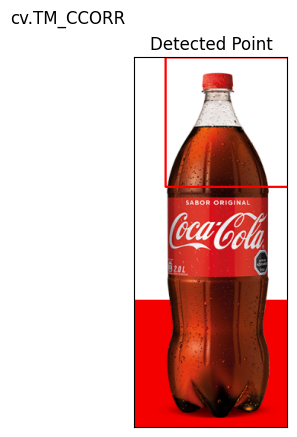

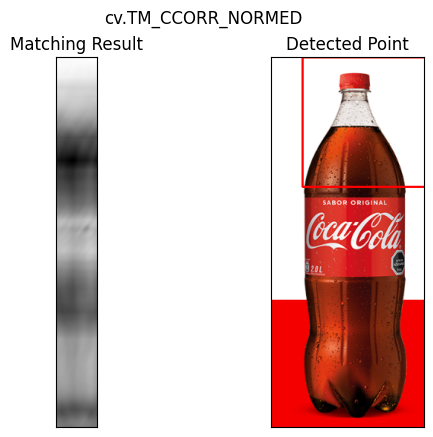

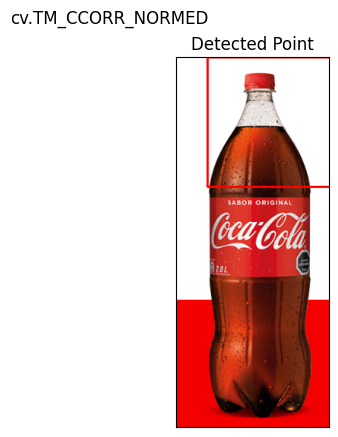

In [11]:
w, h = template_gris.shape[::-1]
# Los 6 métodos posibles para comparación:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
   # Hago una copia de la imagen porque ciclo a ciclo le dibujo rectángulos
   img_salida = img1_rgb.copy()
   method = eval(meth)
   # Aplicamos la coincidencia de patrones
   #--------------------------------------
   res = cv.matchTemplate(img1_gris, template2_gris, method)
   # Encontramos los valores máximos y mínimos
   min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

   # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
   if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
   else:
        top_left = max_loc
        # Marcamos el lugar donde lo haya encontrado
        #----------------------------------------
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img_salida,top_left, bottom_right, 255, 2)
        # Graficamos el procesamiento y la salida
        #----------------------------------------
        plt.figure()

        # Resultado de coincidencia
        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

        # Imagen original con recuadros
        plt.subplot(122),plt.imshow(img_salida)
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    
        plt.suptitle(meth)
        plt.show() 

        # Imagen original con recuadros
        plt.subplot(122),plt.imshow(img_salida)
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    
        plt.suptitle(meth)
        plt.show()

##### La detección incial falló y podemos mejorarla aplicando un proceso de detección de bordes a la imagen.  Según los método seleccionados podemos utilizar algoritmos como Canny, Sobel en las direcciones X e Y, Sobel en ambas direcciones (diagonal), o incluso un enfoque basado en la construcción de pirámides. 

In [12]:
def edge_detection(image, 
                     blur = True, 
                     k_size_blur = (3,3),
                     sigma = 1,
                     edge_type = 'Canny', 
                     thres1 = 0, 
                     thres2 = 255, 
                     k_size_sobel = 5,
                     pyr_steps = 5
                    ):
    # Aplicar desenfoque gaussiano si blur es True
    if blur:
        image = cv.GaussianBlur(image, k_size_blur, sigmaX=sigma, sigmaY=sigma)
        
    # Seleccionar el tipo de detección de bordes
    match edge_type:
        # Canny edge detection
        case 'Canny':
            edges = cv.Canny(image, thres1, thres2, L2gradient=True)
            return edges
        
        # Sobel en dirección X
        case 'SobelX':
            sobelx = cv.Sobel(image, ddepth=cv.CV_64F, dx=1, dy=0, ksize=k_size_sobel)
            return sobelx
        
        # Sobel en dirección Y
        case 'SobelY':
            sobely = cv.Sobel(image, ddepth=cv.CV_64F, dx=0, dy=1, ksize=k_size_sobel)
            return sobely
        
        # Sobel en ambas direcciones (diagonal)
        case 'SobelXY':
            sobelxy = cv.Sobel(image, ddepth=cv.CV_64F, dx=1, dy=1, ksize=k_size_sobel)
            return sobelxy
        
        # Detección de bordes mediante pirámide
        case 'Pyramid':
            gaussian = []
            gaussian_layer = image.copy()
            
            # Construcción de la pirámide gaussiana
            for i in range(pyr_steps):
                gaussian_layer = cv.pyrDown(gaussian_layer)
                gaussian.append(gaussian_layer)
            
            # Generación de la pirámide laplaciana
            laplacian = [gaussian[-1]]
            for i in range(len(gaussian) - 1, 0, -1):
                size = (gaussian[i - 1].shape[1], gaussian[i - 1].shape[0])
                gaussian_expanded = cv.pyrUp(gaussian[i], dstsize=size)
                laplacian_layer = cv.subtract(gaussian[i - 1], gaussian_expanded)
                laplacian.append(laplacian_layer)
            
            return laplacian


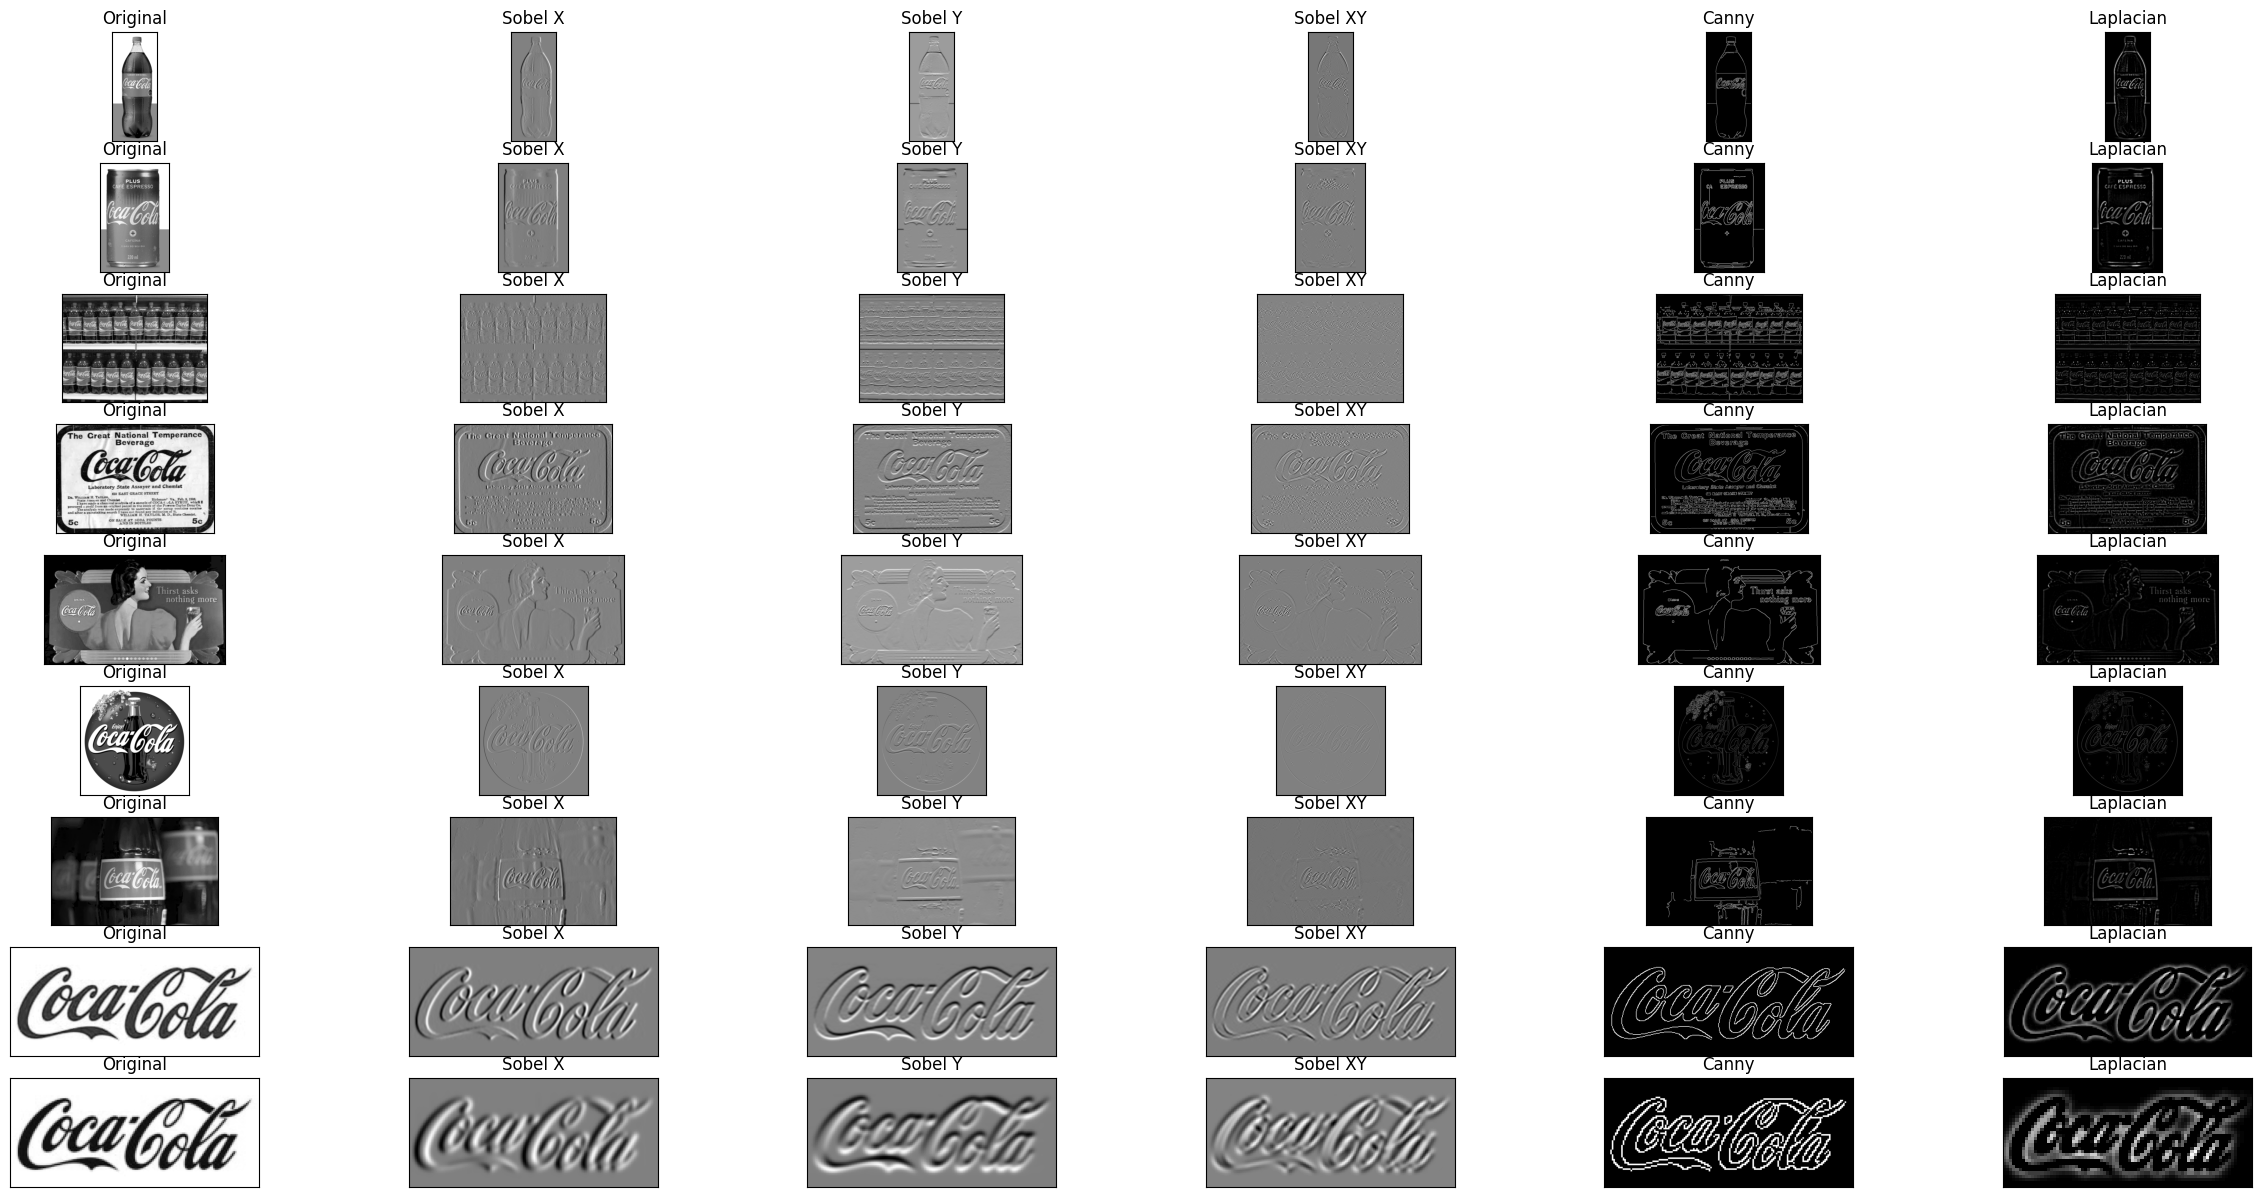

In [13]:
images = [img1_gris, img2_gris, img3_gris, img4_gris, img5_gris, img6_gris, img7_gris, template_gris,template2_gris]

plt.figure(figsize=(30,15))
i = 0
for image in images:
    i += 1

    sigma = 1
    kernel_size = (int(2 * np.ceil(3 * sigma) + 1), int(2 * np.ceil(3 * sigma) + 1))
    
    sobelx = edge_detection(image, True, kernel_size, sigma, 'SobelX', None, None, 5, None)
    sobely = edge_detection(image, True, kernel_size, sigma, 'SobelY', None, None, 5, None)
    sobelxy = edge_detection(image, True, kernel_size, sigma, 'SobelXY', None, None, 5, None)
    canny = edge_detection(image, True, kernel_size, sigma, 'Canny', int(max(0 ,0.5*np.median(image) )), int(min(255,1.8*np.median(image) )), None, None)
    laplacian = edge_detection(image, True, kernel_size, sigma, 'Pyramid', None, None, None, 5)
    laplacian = laplacian[-1]
    
    plt.subplot(len(images), 6, i)
    plt.imshow(image,cmap = 'gray')
    plt.title(f'Original'),plt.xticks([]),plt.yticks([])
    i+=1
    plt.subplot(len(images), 6, i)
    plt.imshow(sobelx,cmap = 'gray')
    plt.title(f'Sobel X'),plt.xticks([]),plt.yticks([])
    i+=1
    plt.subplot(len(images), 6, i)
    plt.imshow(sobely,cmap = 'gray')
    plt.title(f'Sobel Y'),plt.xticks([]),plt.yticks([])
    i+=1
    plt.subplot(len(images), 6, i)
    plt.imshow(sobelxy,cmap = 'gray')
    plt.title(f'Sobel XY'),plt.xticks([]),plt.yticks([])
    i+=1
    plt.subplot(len(images), 6, i)
    plt.imshow(canny,cmap = 'gray')
    plt.title(f'Canny'),plt.xticks([]),plt.yticks([])
    i+=1
    plt.subplot(len(images), 6, i)
    plt.imshow(laplacian,cmap = 'gray')
    plt.title(f'Laplacian'),plt.xticks([]),plt.yticks([])

plt.show()

##### Aplicamos una pirámide laplaciana para representar el template con diferentes escalas de resolución

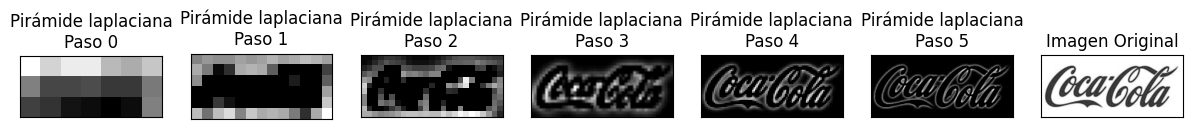

In [14]:
# Definimos el número de escalas para construir la pirámide
scales = 6

# Llamamos a la función edge_detection para generar la pirámide laplaciana
edges_pyr = edge_detection(template_gris, True, (3,3), 3, 'Pyramid', 100, 150, None, scales)

# Creamos una figura de Matplotlib con el tamaño especificado
plt.figure(figsize=(15,10))

# Iteramos sobre cada paso de la pirámide laplaciana
for i in range(scales-1, -1, -1):
    # Configuramos un subplot en la posición correspondiente
    plt.subplot(1, scales+1, i+1)
    
    # Mostramos la imagen del paso actual de la pirámide con un mapa de colores en escala de grises
    plt.imshow(edges_pyr[i], cmap='gray')
    
    # Establecemos un título para el subplot que indica el paso de la pirámide
    plt.title(f'Pirámide laplaciana\nPaso {i}')
    
    # Eliminamos las marcas de los ejes x e y para una visualización más limpia
    plt.xticks([]), plt.yticks([])

# Configuramos el último subplot para mostrar la imagen original
plt.subplot(1, scales+1, scales+1)

# Mostramos la imagen original template_gris con un mapa de colores en escala de grises
plt.imshow(template_gris, cmap='gray')

# Establecemos un título para el último subplot que indica que es la imagen original
plt.title('Imagen Original')

# Eliminamos las marcas de los ejes x e y para una visualización más limpia
plt.xticks([]), plt.yticks([])

# Mostramos la figura completa con todos los subplots
plt.show()


#####  Redimensionamos el template para que siempre quepa completamente en las imagenes. 

In [15]:
#Intersection over Union (IOU)
def calculate_iou(box1, box2):
    # Extraer coordenadas de los bounding boxes
    x1_tl, y1_tl = box1[0]
    x2_tl, y2_tl = box2[0]
    x1_br, y1_br = box1[1]
    x2_br, y2_br = box2[1]

    # Calcular la intersección
    x_overlap = max(0, min(x1_br, x2_br) - max(x1_tl, x2_tl))
    y_overlap = max(0, min(y1_br, y2_br) - max(y1_tl, y2_tl))
    intersection_area = x_overlap * y_overlap

    # Calcular la unión
    box1_area = (x1_br - x1_tl) * (y1_br - y1_tl)
    box2_area = (x2_br - x2_tl) * (y2_br - y2_tl)
    union_area = box1_area + box2_area - intersection_area

    # Calcular IoU 
    iou = intersection_area / union_area if union_area else 0  # Evitar división por cero
    return iou
    
#Eliminación de bounding boxes
def non_max_suppression(bounding_boxes, confidence_scores, iou_threshold):
    selected_boxes = []
    selected_scores = []

    # Iterar hasta que no haya más bounding boxes
    while bounding_boxes:
        # Encontrar el índice del bounding box con el mayor puntaje de confianza
        max_index = np.argmax(confidence_scores)
        # Extraer el bounding box y su puntaje correspondiente
        box = bounding_boxes.pop(max_index)
        score = confidence_scores.pop(max_index)

        # Agregar el bounding box y su puntaje a las selecciones finales
        selected_boxes.append(box)
        selected_scores.append(score)

        # Eliminar los bounding boxes superpuestos basados en IoU
        indices_to_remove = []
        for i, bb in enumerate(bounding_boxes):
            iou = calculate_iou(box, bb)
            if iou > iou_threshold:
                indices_to_remove.append(i)

        # Eliminar los bounding boxes superpuestos de la lista
        indices_to_remove.reverse()
        for idx in indices_to_remove:
            bounding_boxes.pop(idx)
            confidence_scores.pop(idx)

    return selected_boxes, selected_scores


#### Definimos una función para buscar y seleccionar los objetos en una imagen utilizando una plantilla, aplicando comparación de plantillas y supresión de no máximos 

In [16]:
def object_detection(img, template, method, detect_thres, iou_thres, scale_factor, max_scale, modding_template, debugging):
    # Obtener las dimensiones de la plantilla
    w, h = template.shape[::-1]
    
    # Mostrar la imagen y la plantilla si el debugging es verdadero
    if debugging:
        cv.imshow('image', img)
        cv.imshow('template', template)
        cv.waitKey(0)
        cv.destroyAllWindows()

    # Realizar la comparación de la plantilla con la imagen usando matchTemplate
    res = cv.matchTemplate(img.astype(np.uint8), template.astype(np.uint8), eval(method))
    
    # Buscar todos los puntos en los que el resultado supere el umbral de detección
    loc = np.where(res >= detect_thres)
    bounding_boxes = []  # Lista para almacenar los bounding boxes encontrados
    confidence_scores = []  # Lista para almacenar los puntajes de confianza correspondientes
    
    # Iterar sobre los puntos encontrados
    for pt in zip(*loc[::-1]):
        # Coordenadas del bounding box
        top_left = pt
        bottom_right = (pt[0] + w, pt[1] + h)

        # Modificar la plantilla si modding_template es verdadero
        if modding_template:
            # Redimensionar el bounding box de la plantilla
            top_left_x, top_left_y = top_left
            top_left_x -= int(np.floor(80 / scale_factor))
            top_left = (top_left_x, top_left_y)
            bottom_right_x, bottom_right_y = bottom_right
            bottom_right_x += int(np.floor(110 / scale_factor))
            bottom_right = (bottom_right_x, bottom_right_y)

        bbox = (top_left, bottom_right)  # Crear el bounding box
        
        # Puntaje de confianza
        confidence_score = res[pt[1], pt[0]]

        bounding_boxes.append(bbox)  # Agregar el bounding box a la lista
        confidence_scores.append(confidence_score)  # Agregar el puntaje de confianza a la lista
        
    # Aplicar supresión de no máximos para eliminar bounding boxes superpuestos
    selected_boxes, selected_scores = non_max_suppression(bounding_boxes, confidence_scores, iou_thres)

    return selected_boxes, selected_scores


##### Adicionalmente generamos una función realiza la detección de un logotipo en una imagen, aplicando detección de bordes y escalando la imagen a múltiples niveles para encontrar coincidencias con una plantilla. Utiliza un método de coincidencia especificado y realiza supresión de no máximos para eliminar bounding boxes redundantes.

In [17]:
def logo_detection(image, template, method='cv.TM_CCOEFF_NORMED', scales=10, min_scale=0.25, max_scale=5, blur=True, k_size_blur=(3,3), sigma=1, edge_detection_type='Canny', thres1=0, thres2=255, k_size_sobel=5, pyr_steps=5, detect_thres=0.75, iou_thres=0.5, modding_template=False, debugging=False):
    # Variables temporales
    temp_image = image.copy()
    temp_template = template.copy()
    global_bounding_boxes = []  # Lista para almacenar los bounding boxes encontrados
    global_confidence_scores = []  # Lista para almacenar los puntajes de confianza correspondientes

    # Aplicar filtro gaussiano y detección de bordes a la imagen y la plantilla
    filtered_temp_image = edge_detection(temp_image, blur, k_size_blur, sigma, edge_detection_type, thres1, thres2, k_size_sobel, pyr_steps)
    filtered_temp_template = edge_detection(temp_template, blur, (3,3), 3, edge_detection_type, thres1, thres2, k_size_sobel, pyr_steps)
    
    # En caso de elegir pirámides LoG, seleccionar la de mayor calidad
    if edge_detection_type == 'Pyramid':
        filtered_temp_image = filtered_temp_image[-1]
        filtered_temp_template = filtered_temp_template[-1]
    
    # Escalar imágenes y detectar objetos
    scale_factors = np.logspace(min_scale, max_scale, num=scales, base=np.e)
    progress = 0
    for scale_factor in scale_factors:
        # Imprimir progreso
        clear_output(wait=True)
        print(f'{progress / len(scale_factors) * 100:.2f}%')
        progress += 1
        
        # Escalar la imagen filtrada temporalmente
        scaled_filtered_temp_image = cv.resize(filtered_temp_image, None, fx=scale_factor, fy=scale_factor)

        # Verificar si la imagen escalada es lo suficientemente grande para la plantilla
        if (scaled_filtered_temp_image.shape[0] < filtered_temp_template.shape[0] or 
            scaled_filtered_temp_image.shape[1] < filtered_temp_template.shape[1]):
            continue

        # Detectar objetos en la imagen escalada
        scaled_bounding_boxes, confidence_scores = object_detection(scaled_filtered_temp_image, filtered_temp_template, method, detect_thres, iou_thres, scale_factor, max_scale, modding_template, debugging)
        
        # Ajustar las coordenadas de los bounding boxes a la escala original
        bounding_boxes = [[(int(x // scale_factor), int(y // scale_factor)) for x, y in pair] for pair in scaled_bounding_boxes]
        global_bounding_boxes.append(bounding_boxes)
        global_confidence_scores.append(confidence_scores)
    
    return global_bounding_boxes, global_confidence_scores


##### Definimos una función general que detecte logos en una imagen usando coincidencia de plantillas a múltiples escalas y aplicando supresión no máxima.

In [18]:
def test_image(image, template, method, scales, min_scale, max_scale, blur, blur_kernel, blur_sigma, edge_method, canny_thres1, canny_thres2, sobel_kernel, pyramid_steps, detect_thres, iou_thres1, iou_thres2, modding_template, debugging):
    t_template = template.copy()
    if modding_template:
        #modded_width = t_template.shape[1] // 4
        mod_template = t_template[:, 80 : -110]
        t_template = mod_template.copy()

    # El IoU threshold de este punto elimina bounding boxes en una misma escala
    bounding_boxes, confidence_scores = logo_detection(image, t_template, method, scales, min_scale, max_scale, blur, blur_kernel, blur_sigma, edge_method, canny_thres1, canny_thres2, sobel_kernel, pyramid_steps, detect_thres, iou_thres1, modding_template, debugging)
    # Los bounding boxes y confidence scores almacenados aqui estan agrupados por escala

    list_bounding_boxes = []
    list_confidence_scores = []

    for sublist_scores, sublist_boxes in zip(confidence_scores, bounding_boxes):
        for score, box in zip(sublist_scores, sublist_boxes):
            if sublist_scores:
                list_bounding_boxes.append(box)
                list_confidence_scores.append(score)
    # A partir de este punto, todos los bounding boxes de todas las escalas estan juntos

    # El IoU threshold de este punto elimina bounding boxes entre distintas escalas
    print(list_confidence_scores)
    mod_flat_bounding_boxes, mod_flat_confidence_scores = non_max_suppression(list_bounding_boxes, list_confidence_scores, iou_thres2)
    print(mod_flat_confidence_scores)
    return mod_flat_bounding_boxes, mod_flat_confidence_scores



##### Finalmente generamos una función para identificar y dibujar los bounding boxes

In [19]:
def draw_bounding_boxes(image, template, bounding_boxes, confidence_scores, modding_template, colors, debugging):
    # Crear una copia de la imagen original para dibujar los bounding boxes
    img_salida = image.copy()
    
    # Iterar sobre cada bounding box y su puntaje de confianza
    for i, (bbox, confidence) in enumerate(zip(bounding_boxes, confidence_scores)):
        # Extraer las coordenadas de la esquina superior izquierda e inferior derecha del bounding box
        top_left, bottom_right = bbox
        
        # Seleccionar un color para el bounding box de la lista de colores proporcionada
        color = colors[i % len(colors)]
        
        # Dibujar el bounding box en la imagen de salida
        cv.rectangle(img_salida, top_left, bottom_right, color, 2)
        
        # Mostrar el puntaje de confianza junto al bounding box
        cv.putText(img_salida, f'Confidence: {confidence*100:.0f}%', (top_left[0], top_left[1] - 10), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
    
    # Devolver la imagen con los bounding boxes dibujados
    return img_salida


Abajo vamos a ir probando imagen a imagen con los parámetros correspondientes la identificación del logotipo:

In [20]:
# Cargar la imagen de plantilla en escala de grises
template = cv.imread(img_path2 + 'pattern.png', cv.IMREAD_GRAYSCALE)# Quitamos los pedazos blancos del template para evitar match en zonas donde no deberia.

# Generar una lista de colores aleatorios para dibujar los bounding boxes
num_colors = 30
colors = [(random.randint(0, 100), random.randint(0, 100), random.randint(0, 100)) for _ in range(num_colors)]

# Lista de nombres de imágenes a procesar
image_names = [
    '/coca_logo_1.png',
    '/coca_logo_2.png',
    '/coca_multi.png',
    '/coca_retro_1.png',
    '/coca_retro_2.png',
    '/COCA-COLA-LOGO.jpg',
    '/logo_1.png'
]

In [21]:
colors = [(random.randint(0, 100), random.randint(0, 100), random.randint(0, 100)) for _ in range(30)]
image_names = ['/coca_logo_1.png', '/coca_logo_2.png', '/coca_multi.png', '/coca_retro_1.png', '/coca_retro_2.png', '/COCA-COLA-LOGO.jpg', '/logo_1.png']

99.00%
[0.32381293, 0.4286134, 0.2438029]
[0.4286134]


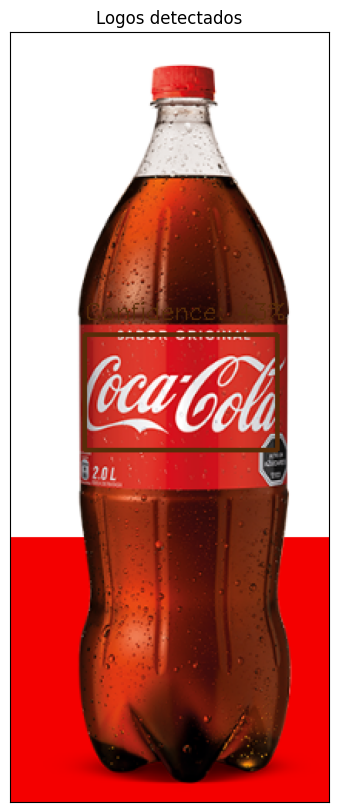

In [22]:
index = 0 #establecer un valor inicial para el índice que se usará para la selección de imagenes
image = cv.imread(img_path1 + image_names[index], cv.IMREAD_GRAYSCALE) # Leer la imagen en escala de grises
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR', 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED'] # Métodos de coincidencia de plantillas 
method = methods[1] # Seleccionar un método específico de coincidencia de plantillas
scales = 100 # Definir el número de escalas para la detección
min_scale = -2.3 # Definir el rango mínimo de escalado logarítmico
max_scale = 1.8 # Definir el rango máximo de escalado logarítmico
blur = True # Activar el desenfoque de imagen
blur_kernel = (5,5) # Define el tamaño del kernel que se utilizará para aplicar el desenfoque Gaussiano a la imagen.
blur_sigma = 1 # Definir el valor sigma para la dispersión del desenfoque gaussiano
edge_method = 'Canny' # Método de detección de bordes a utilizar 

# Umbrales para el detector de bordes Canny
canny_thres1 = 100
canny_thres2 = 150

# Tamaño del kernel para el filtro Sobel
sobel_kernel = 5

# Número de pasos en la pirámide gaussiana
pyramid_steps = 3

# Umbral de detección para el método de coincidencia de plantillas
detect_thres = 0.2

# Umbrales de IoU (Intersection over Union) para la supresión de no máximos
iou_thres1 = 0.1
iou_thres2 = 0.1

modding_template = True
debugging = False

# Ejecutar la función de detección de objetos en la imagen utilizando los parámetros definidos
bounding_boxes, confidence_scores = test_image(
    image, template_gris, method, scales, min_scale, max_scale, blur, blur_kernel, blur_sigma, 
    edge_method, canny_thres1, canny_thres2, sobel_kernel, pyramid_steps, detect_thres, 
    iou_thres1, iou_thres2, modding_template, debugging
)

# Volver a leer la imagen original en color (BGR) para dibujar los bounding boxes detectados
image = cv.imread(img_path1 + image_names[index])

# Convertir la imagen de BGR a RGB para una correcta visualización en matplotlib
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Dibujar los bounding boxes detectados en la imagen
output = draw_bounding_boxes(image, template, bounding_boxes, confidence_scores, modding_template, colors, debugging)

# Crear una figura para mostrar la imagen con los bounding boxes detectados
plt.figure(figsize=(10,10))
plt.imshow(output)
plt.title("Logos detectados")
plt.xticks([])  # Ocultar las marcas del eje x
plt.yticks([])  # Ocultar las marcas del eje y
plt.show()  # Mostrar la imagen con los bounding boxes

99.00%
[0.23955491, 0.35950544, 0.2668629]
[0.35950544]


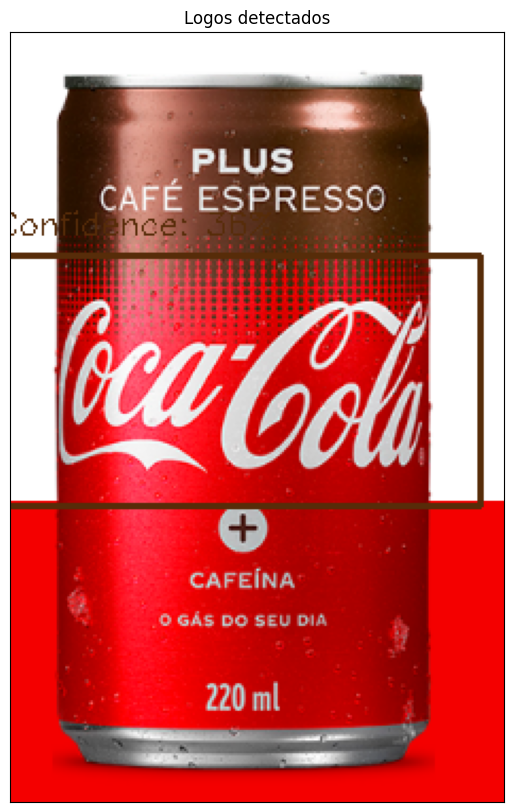

In [25]:
index = 1 #establecer un valor inicial para el índice que se usará para la selección de imagenes
image = cv.imread(img_path1 + image_names[index], cv.IMREAD_GRAYSCALE) # Leer la imagen en escala de grises
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR', 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED'] # Métodos de coincidencia de plantillas 
method = methods[1] # Seleccionar un método específico de coincidencia de plantillas
scales = 100 # Definir el número de escalas para la detección
min_scale = -2.3 # Definir el rango mínimo de escalado logarítmico
max_scale = 1.8 # Definir el rango máximo de escalado logarítmico
blur = True # Activar el desenfoque de imagen
blur_kernel = (5,5) # Define el tamaño del kernel que se utilizará para aplicar el desenfoque Gaussiano a la imagen.
blur_sigma = 1 # Definir el valor sigma para la dispersión del desenfoque gaussiano
edge_method = 'Canny' # Método de detección de bordes a utilizar 

# Umbrales para el detector de bordes Canny
canny_thres1 = 100
canny_thres2 = 150

# Tamaño del kernel para el filtro Sobel
sobel_kernel = 5

# Número de pasos en la pirámide gaussiana
pyramid_steps = 3

# Umbral de detección para el método de coincidencia de plantillas
detect_thres = 0.2

# Umbrales de IoU (Intersection over Union) para la supresión de no máximos
iou_thres1 = 0.1
iou_thres2 = 0.1

modding_template = True
debugging = False

# Ejecutar la función de detección de objetos en la imagen utilizando los parámetros definidos
bounding_boxes, confidence_scores = test_image(
    image, template_gris, method, scales, min_scale, max_scale, blur, blur_kernel, blur_sigma, 
    edge_method, canny_thres1, canny_thres2, sobel_kernel, pyramid_steps, detect_thres, 
    iou_thres1, iou_thres2, modding_template, debugging
)

# Volver a leer la imagen original en color (BGR) para dibujar los bounding boxes detectados
image = cv.imread(img_path1 + image_names[index])

# Convertir la imagen de BGR a RGB para una correcta visualización en matplotlib
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Dibujar los bounding boxes detectados en la imagen
output = draw_bounding_boxes(image, template, bounding_boxes, confidence_scores, modding_template, colors, debugging)

# Crear una figura para mostrar la imagen con los bounding boxes detectados
plt.figure(figsize=(10,10))
plt.imshow(output)
plt.title("Logos detectados")
plt.xticks([])  # Ocultar las marcas del eje x
plt.yticks([])  # Ocultar las marcas del eje y
plt.show()  # Mostrar la imagen con los bounding boxes

99.00%
[0.1536824, 0.15019748, 0.16537657, 0.16233966, 0.16030227, 0.1592679, 0.15655096, 0.156069, 0.15508886, 0.15108871, 0.17371126, 0.17060654, 0.16626474, 0.1640491, 0.16306473, 0.16215952, 0.15966605, 0.15656038, 0.15602173, 0.15526058, 0.15423723, 0.15315382, 0.15213649, 0.1503638, 0.1810885, 0.17758676, 0.17751847, 0.17550108, 0.17369637, 0.17366423, 0.1721922, 0.1710627, 0.17095035, 0.16623826, 0.1641076, 0.16100274, 0.15876472, 0.15632391, 0.15547578, 0.15342914, 0.15134628, 0.22912969, 0.22398259, 0.21308692, 0.21126866, 0.21038637, 0.207336, 0.20098956, 0.19949487, 0.1976488, 0.19286646, 0.18852834, 0.18684581, 0.18183906, 0.1660762, 0.16223206, 0.15811379, 0.15710488, 0.15589973, 0.25841165, 0.2505381, 0.24632844, 0.24595603, 0.2444192, 0.24389325, 0.24104047, 0.23927979, 0.23921071, 0.23354593, 0.23265073, 0.22031859, 0.20953122, 0.18926388, 0.17799737, 0.16404921, 0.16076007, 0.15909849, 0.151752, 0.24448043, 0.23984884, 0.23955886, 0.23835921, 0.23459102, 0.22997814, 0.

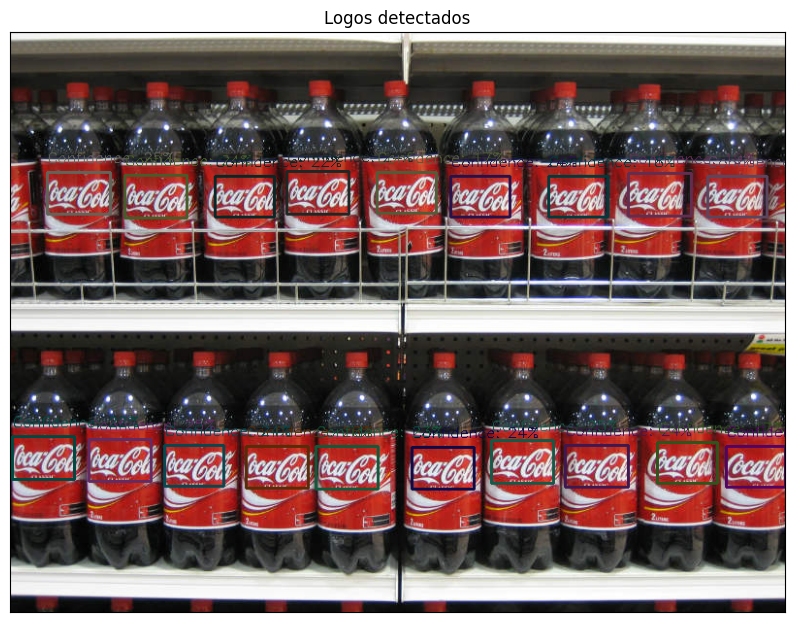

In [26]:
index = 2 #establecer un valor inicial para el índice que se usará para la selección de imagenes
image = cv.imread(img_path1 + image_names[index], cv.IMREAD_GRAYSCALE) # Leer la imagen en escala de grises
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR', 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED'] # Métodos de coincidencia de plantillas 
method = methods[1] # Seleccionar un método específico de coincidencia de plantillas
scales = 100 # Definir el número de escalas para la detección
min_scale = -2.3 # Definir el rango mínimo de escalado logarítmico
max_scale = 1.8 # Definir el rango máximo de escalado logarítmico
blur = True # Activar el desenfoque de imagen
blur_kernel = (5,5) # Define el tamaño del kernel que se utilizará para aplicar el desenfoque Gaussiano a la imagen.
blur_sigma = 1 # Definir el valor sigma para la dispersión del desenfoque gaussiano
edge_method = 'Canny' # Método de detección de bordes a utilizar 

# Umbrales para el detector de bordes Canny
canny_thres1 = 100
canny_thres2 = 150

# Tamaño del kernel para el filtro Sobel
sobel_kernel = 5

# Número de pasos en la pirámide gaussiana
pyramid_steps = 3

# Umbral de detección para el método de coincidencia de plantillas
detect_thres = 0.15

# Umbrales de IoU (Intersection over Union) para la supresión de no máximos
iou_thres1 = 0.1
iou_thres2 = 0.1

modding_template = True
debugging = False

# Ejecutar la función de detección de objetos en la imagen utilizando los parámetros definidos
bounding_boxes, confidence_scores = test_image(
    image, template_gris, method, scales, min_scale, max_scale, blur, blur_kernel, blur_sigma, 
    edge_method, canny_thres1, canny_thres2, sobel_kernel, pyramid_steps, detect_thres, 
    iou_thres1, iou_thres2, modding_template, debugging
)

# Volver a leer la imagen original en color (BGR) para dibujar los bounding boxes detectados
image = cv.imread(img_path1 + image_names[index])

# Convertir la imagen de BGR a RGB para una correcta visualización en matplotlib
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Dibujar los bounding boxes detectados en la imagen
output = draw_bounding_boxes(image, template, bounding_boxes, confidence_scores, modding_template, colors, debugging)

# Crear una figura para mostrar la imagen con los bounding boxes detectados
plt.figure(figsize=(10,10))
plt.imshow(output)
plt.title("Logos detectados")
plt.xticks([])  # Ocultar las marcas del eje x
plt.yticks([])  # Ocultar las marcas del eje y
plt.show()  # Mostrar la imagen con los bounding boxes

99.00%
[]
[]


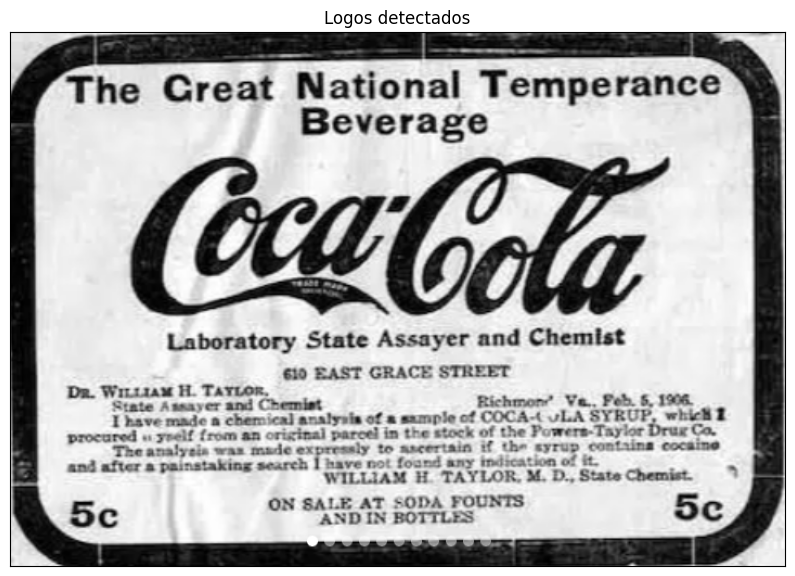

In [27]:
index = 3 #establecer un valor inicial para el índice que se usará para la selección de imagenes
image = cv.imread(img_path1 + image_names[index], cv.IMREAD_GRAYSCALE) # Leer la imagen en escala de grises
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR', 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED'] # Métodos de coincidencia de plantillas 
method = methods[1] # Seleccionar un método específico de coincidencia de plantillas
scales = 100 # Definir el número de escalas para la detección
min_scale = -2.3 # Definir el rango mínimo de escalado logarítmico
max_scale = 1.8 # Definir el rango máximo de escalado logarítmico
blur = True # Activar el desenfoque de imagen
blur_kernel = (5,5) # Define el tamaño del kernel que se utilizará para aplicar el desenfoque Gaussiano a la imagen.
blur_sigma = 1 # Definir el valor sigma para la dispersión del desenfoque gaussiano
edge_method = 'Canny' # Método de detección de bordes a utilizar 

# Umbrales para el detector de bordes Canny
canny_thres1 = 100
canny_thres2 = 150

# Tamaño del kernel para el filtro Sobel
sobel_kernel = 5

# Número de pasos en la pirámide gaussiana
pyramid_steps = 3

# Umbral de detección para el método de coincidencia de plantillas
detect_thres = 0.2

# Umbrales de IoU (Intersection over Union) para la supresión de no máximos
iou_thres1 = 0.1
iou_thres2 = 0.1

modding_template = True
debugging = False

# Ejecutar la función de detección de objetos en la imagen utilizando los parámetros definidos
bounding_boxes, confidence_scores = test_image(
    image, template_gris, method, scales, min_scale, max_scale, blur, blur_kernel, blur_sigma, 
    edge_method, canny_thres1, canny_thres2, sobel_kernel, pyramid_steps, detect_thres, 
    iou_thres1, iou_thres2, modding_template, debugging
)

# Volver a leer la imagen original en color (BGR) para dibujar los bounding boxes detectados
image = cv.imread(img_path1 + image_names[index])

# Convertir la imagen de BGR a RGB para una correcta visualización en matplotlib
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Dibujar los bounding boxes detectados en la imagen
output = draw_bounding_boxes(image, template, bounding_boxes, confidence_scores, modding_template, colors, debugging)

# Crear una figura para mostrar la imagen con los bounding boxes detectados
plt.figure(figsize=(10,10))
plt.imshow(output)
plt.title("Logos detectados")
plt.xticks([])  # Ocultar las marcas del eje x
plt.yticks([])  # Ocultar las marcas del eje y
plt.show()  # Mostrar la imagen con los bounding boxes

99.00%
[0.21572252, 0.24172023, 0.21530639, 0.20085366]
[0.24172023]


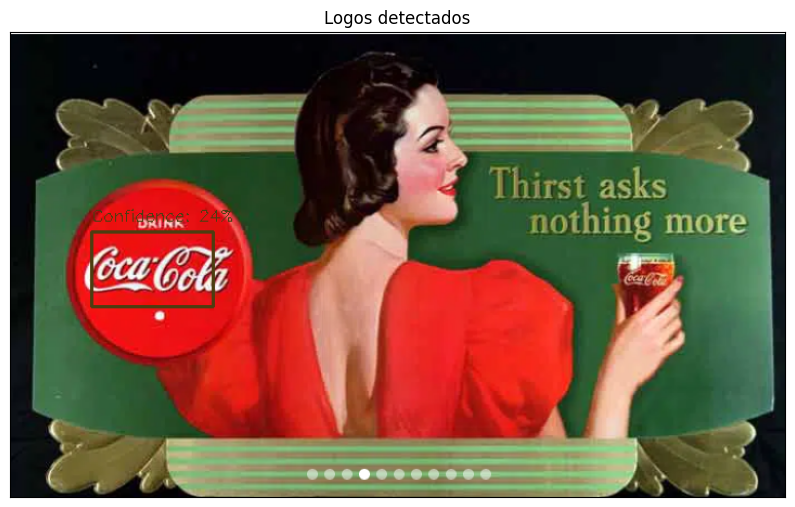

In [47]:
index = 4 #establecer un valor inicial para el índice que se usará para la selección de imagenes
image = cv.imread(img_path1 + image_names[index], cv.IMREAD_GRAYSCALE) # Leer la imagen en escala de grises
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR', 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED'] # Métodos de coincidencia de plantillas 
method = methods[1] # Seleccionar un método específico de coincidencia de plantillas
scales = 100 # Definir el número de escalas para la detección
min_scale = -2.3 # Definir el rango mínimo de escalado logarítmico
max_scale = 1.8 # Definir el rango máximo de escalado logarítmico
blur = True # Activar el desenfoque de imagen
blur_kernel = (5,5) # Define el tamaño del kernel que se utilizará para aplicar el desenfoque Gaussiano a la imagen.
blur_sigma = 1 # Definir el valor sigma para la dispersión del desenfoque gaussiano
edge_method = 'Canny' # Método de detección de bordes a utilizar 

# Umbrales para el detector de bordes Canny
canny_thres1 = 100
canny_thres2 = 150

# Tamaño del kernel para el filtro Sobel
sobel_kernel = 5

# Número de pasos en la pirámide gaussiana
pyramid_steps = 3

# Umbral de detección para el método de coincidencia de plantillas
detect_thres = 0.2

# Umbrales de IoU (Intersection over Union) para la supresión de no máximos
iou_thres1 = 0.1
iou_thres2 = 0.1

modding_template = True
debugging = False

# Ejecutar la función de detección de objetos en la imagen utilizando los parámetros definidos
bounding_boxes, confidence_scores = test_image(
    image, template_gris, method, scales, min_scale, max_scale, blur, blur_kernel, blur_sigma, 
    edge_method, canny_thres1, canny_thres2, sobel_kernel, pyramid_steps, detect_thres, 
    iou_thres1, iou_thres2, modding_template, debugging
)

# Volver a leer la imagen original en color (BGR) para dibujar los bounding boxes detectados
image = cv.imread(img_path1 + image_names[index])

# Convertir la imagen de BGR a RGB para una correcta visualización en matplotlib
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Dibujar los bounding boxes detectados en la imagen
output = draw_bounding_boxes(image, template, bounding_boxes, confidence_scores, modding_template, colors, debugging)

# Crear una figura para mostrar la imagen con los bounding boxes detectados
plt.figure(figsize=(10,10))
plt.imshow(output)
plt.title("Logos detectados")
plt.xticks([])  # Ocultar las marcas del eje x
plt.yticks([])  # Ocultar las marcas del eje y
plt.show()  # Mostrar la imagen con los bounding boxes

99.00%
[]
[]


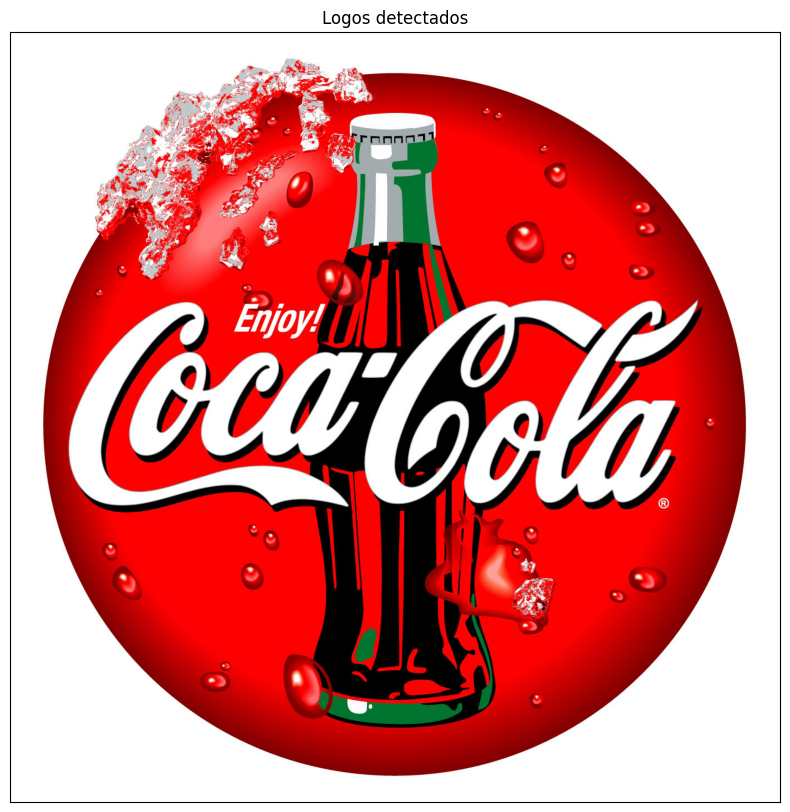

In [52]:
index = 5 #establecer un valor inicial para el índice que se usará para la selección de imagenes
image = cv.imread(img_path1 + image_names[index], cv.IMREAD_GRAYSCALE) # Leer la imagen en escala de grises
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR', 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED'] # Métodos de coincidencia de plantillas 
method = methods[1] # Seleccionar un método específico de coincidencia de plantillas
scales = 100 # Definir el número de escalas para la detección
min_scale = -2.3 # Definir el rango mínimo de escalado logarítmico
max_scale = 1.8 # Definir el rango máximo de escalado logarítmico
blur = True # Activar el desenfoque de imagen
blur_kernel = (5,5) # Define el tamaño del kernel que se utilizará para aplicar el desenfoque Gaussiano a la imagen.
blur_sigma = 1 # Definir el valor sigma para la dispersión del desenfoque gaussiano
edge_method = 'Canny' # Método de detección de bordes a utilizar 

# Umbrales para el detector de bordes Canny
canny_thres1 = 100
canny_thres2 = 150

# Tamaño del kernel para el filtro Sobel
sobel_kernel = 5

# Número de pasos en la pirámide gaussiana
pyramid_steps = 3

# Umbral de detección para el método de coincidencia de plantillas
detect_thres = 0.25

# Umbrales de IoU (Intersection over Union) para la supresión de no máximos
iou_thres1 = 0.1
iou_thres2 = 0.1

modding_template = True
debugging = False

# Ejecutar la función de detección de objetos en la imagen utilizando los parámetros definidos
bounding_boxes, confidence_scores = test_image(
    image, template_gris, method, scales, min_scale, max_scale, blur, blur_kernel, blur_sigma, 
    edge_method, canny_thres1, canny_thres2, sobel_kernel, pyramid_steps, detect_thres, 
    iou_thres1, iou_thres2, modding_template, debugging
)

# Volver a leer la imagen original en color (BGR) para dibujar los bounding boxes detectados
image = cv.imread(img_path1 + image_names[index])

# Convertir la imagen de BGR a RGB para una correcta visualización en matplotlib
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Dibujar los bounding boxes detectados en la imagen
output = draw_bounding_boxes(image, template, bounding_boxes, confidence_scores, modding_template, colors, debugging)

# Crear una figura para mostrar la imagen con los bounding boxes detectados
plt.figure(figsize=(10,10))
plt.imshow(output)
plt.title("Logos detectados")
plt.xticks([])  # Ocultar las marcas del eje x
plt.yticks([])  # Ocultar las marcas del eje y
plt.show()  # Mostrar la imagen con los bounding boxes

99.00%
[0.20174327, 0.21030723]
[0.21030723]


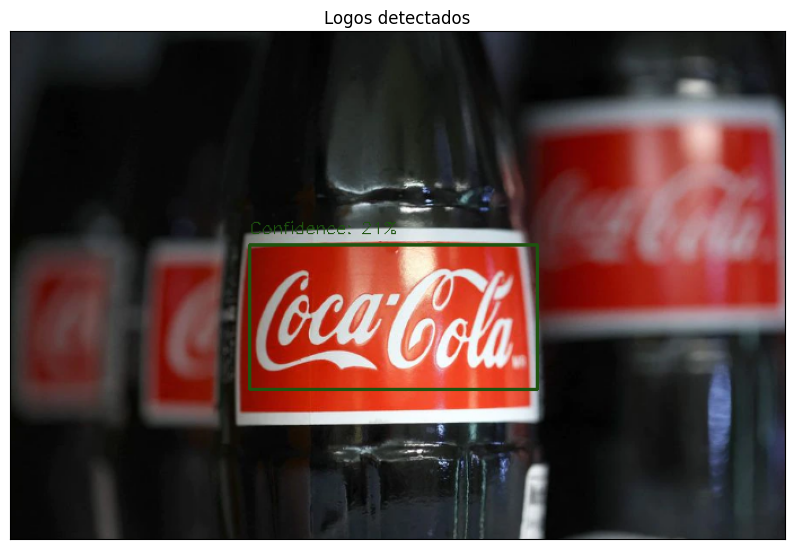

In [33]:
index = 6 #establecer un valor inicial para el índice que se usará para la selección de imagenes
image = cv.imread(img_path1 + image_names[index], cv.IMREAD_GRAYSCALE) # Leer la imagen en escala de grises
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR', 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED'] # Métodos de coincidencia de plantillas 
method = methods[1] # Seleccionar un método específico de coincidencia de plantillas
scales = 100 # Definir el número de escalas para la detección
min_scale = -2.3 # Definir el rango mínimo de escalado logarítmico
max_scale = 1.8 # Definir el rango máximo de escalado logarítmico
blur = True # Activar el desenfoque de imagen
blur_kernel = (5,5) # Define el tamaño del kernel que se utilizará para aplicar el desenfoque Gaussiano a la imagen.
blur_sigma = 1 # Definir el valor sigma para la dispersión del desenfoque gaussiano
edge_method = 'Canny' # Método de detección de bordes a utilizar 

# Umbrales para el detector de bordes Canny
canny_thres1 = 100
canny_thres2 = 150

# Tamaño del kernel para el filtro Sobel
sobel_kernel = 5

# Número de pasos en la pirámide gaussiana
pyramid_steps = 3

# Umbral de detección para el método de coincidencia de plantillas
detect_thres = 0.2

# Umbrales de IoU (Intersection over Union) para la supresión de no máximos
iou_thres1 = 0.1
iou_thres2 = 0.1

modding_template = True
debugging = False

# Ejecutar la función de detección de objetos en la imagen utilizando los parámetros definidos
bounding_boxes, confidence_scores = test_image(
    image, template_gris, method, scales, min_scale, max_scale, blur, blur_kernel, blur_sigma, 
    edge_method, canny_thres1, canny_thres2, sobel_kernel, pyramid_steps, detect_thres, 
    iou_thres1, iou_thres2, modding_template, debugging
)

# Volver a leer la imagen original en color (BGR) para dibujar los bounding boxes detectados
image = cv.imread(img_path1 + image_names[index])

# Convertir la imagen de BGR a RGB para una correcta visualización en matplotlib
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Dibujar los bounding boxes detectados en la imagen
output = draw_bounding_boxes(image, template, bounding_boxes, confidence_scores, modding_template, colors, debugging)

# Crear una figura para mostrar la imagen con los bounding boxes detectados
plt.figure(figsize=(10,10))
plt.imshow(output)
plt.title("Logos detectados")
plt.xticks([])  # Ocultar las marcas del eje x
plt.yticks([])  # Ocultar las marcas del eje y
plt.show()  # Mostrar la imagen con los bounding boxes